In [643]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score  
import pandas as pd

In [650]:
data = pd.read_csv('./disease_beta.csv')
ph = pd.read_csv('./disease_ph.csv')

In [16]:
# 根据 'Group' 列进行切分
grouped = data.groupby('disease')
# 遍历每个分组并输出
for group_name, group_data in grouped:
    print(f"disease: {group_name}")
    file = './data/' + group_name + '_beta.csv'
    group_data.to_csv(file, index=False)

disease: Alzheimers disease
disease: Brain cancer
disease: Breast cancer
disease: Colon cancer
disease: Frontotemporal dementia
disease: Gastric cancer
disease: Healthy
disease: Kidney cancer
disease: Liver cancer
disease: Lung cancer
disease: Nephrogenic rest
disease: Parkinsons disease
disease: Progressive supranuclear palsy
disease: Prostate cancer
disease: Small intestine cancer


In [5]:
Healthy = pd.read_csv('./data/Healthy_beta.csv')
del Healthy['Unnamed: 0']
Healthy

,cg00008493,cg00126034,cg00136477,cg00164898,cg00613255,cg00646492,cg00815440,cg00943909,cg01228636,cg01355739,...,cg25870420,cg26119796,cg26124016,cg26609691,cg27040423,cg27182551,cg27486427,cg27522780,label,disease
0,0.861181,0.111727,0.685328,0.115364,0.830202,0.140907,0.019162,0.488152,0.087627,0.574915,...,0.038118,0.758571,0.032489,0.882039,0.130840,0.818644,0.088436,0.189836,0,Healthy
1,0.886645,0.098869,0.717721,0.095533,0.822217,0.134210,0.014741,0.446393,0.079783,0.513645,...,0.042488,0.763045,0.031494,0.899622,0.115114,0.838535,0.082901,0.146300,0,Healthy
2,0.853499,0.131807,0.681562,0.177807,0.827619,0.183012,0.019694,0.483692,0.089379,0.554223,...,0.040492,0.728792,0.029020,0.878082,0.114955,0.797491,0.086722,0.188970,0,Healthy
3,0.877414,0.122616,0.712148,0.093864,0.864334,0.174914,0.016781,0.445794,0.089585,0.551108,...,0.038230,0.720400,0.035705,0.878952,0.142703,0.824763,0.079107,0.145201,0,Healthy
4,0.912344,0.116082,0.752917,0.125665,0.864716,0.218145,0.019460,0.440504,0.075774,0.543169,...,0.036300,0.699372,0.028243,0.863205,0.098129,0.874112,0.091329,0.177984,0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.970300,0.080800,0.757700,0.066300,0.881100,0.210000,0.017100,0.677800,0.046800,0.817500,...,0.045900,0.688000,0.104800,0.967000,0.095700,0.931400,0.037100,0.087700,0,Healthy
811,0.966300,0.076200,0.716800,0.047500,0.743900,0.169400,0.017000,0.594100,0.058400,0.797600,...,0.054700,0.649600,0.067100,0.966900,0.088700,0.830600,0.034000,0.057400,0,Healthy
812,0.976100,0.070000,0.660600,0.045200,0.791700,0.126400,0.014500,0.593600,0.046300,0.752900,...,0.035000,0.739400,0.059300,0.958700,0.072500,0.880800,0.038900,0.065500,0,Healthy
813,0.948900,0.068000,0.689000,0.048000,0.755500,0.130400,0.029300,0.574700,0.060100,0.701000,...,0.037300,0.669800,0.080900,0.947500,0.062100,0.802600,0.038200,0.072500,0,Healthy


In [562]:
data = pd.read_csv('./data/Brain cancer_beta.csv')
data.head()

,Unnamed: 0,cg00008493,cg00126034,cg00136477,cg00164898,cg00613255,cg00646492,cg00815440,cg00943909,cg01228636,...,cg25870420,cg26119796,cg26124016,cg26609691,cg27040423,cg27182551,cg27486427,cg27522780,label,disease
0,GSM2046451,0.898260,0.178683,0.650931,0.200701,0.853774,0.190614,0.037761,0.510423,0.118249,...,0.040592,0.747267,0.031111,0.871984,0.164076,0.802888,0.133956,0.166172,1,Brain cancer
1,GSM2046452,0.933990,0.158600,0.625467,0.187622,0.812745,0.211975,0.022630,0.520004,0.119173,...,0.030315,0.768375,0.013875,0.873343,0.150835,0.744418,0.151192,0.166578,1,Brain cancer
2,GSM2046453,0.876139,0.136093,0.637770,0.248746,0.852188,0.230769,0.046571,0.498397,0.221766,...,0.025542,0.801101,0.026651,0.887726,0.241155,0.797482,0.152849,0.213240,1,Brain cancer
3,GSM2046454,0.924919,0.172853,0.688135,0.303590,0.880755,0.266975,0.037744,0.465851,0.172667,...,0.037391,0.784061,0.029924,0.902047,0.179216,0.848810,0.157643,0.213306,1,Brain cancer
4,GSM2046455,0.937338,0.146154,0.725503,0.231140,0.874945,0.229268,0.027291,0.260055,0.178185,...,0.033544,0.788122,0.025962,0.934883,0.206988,0.842233,0.150392,0.236514,1,Brain cancer


In [651]:
del data['Unnamed: 0']
data.shape

(3232, 323)

In [690]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X.values,y.values, test_size=0.5, random_state=21)

In [692]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, roc_curve,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [693]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.optimizers import Adam

In [793]:
# 创建和训练MLP模型（同上）  
model = Sequential()  
model.add(Dense(64, activation='selu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='selu'))  
model.add(Dense(32, activation='selu')) 
model.add(Dense(32, activation='selu')) 
model.add(Dense(32, activation='selu')) 
model.add(Dense(1, activation='sigmoid')) 
optimizer=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])  
history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_test, y_test))  

Train on 800 samples, validate on 800 samples
Epoch 1/200
100/800 [==>...........................] - ETA: 1s - loss: 0.7285 - acc: 0.4300

D:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


800/800 [==============================] - 1s 880us/sample - loss: 1.0381 - acc: 0.4950 - val_loss: 0.6926 - val_acc: 0.4775
Epoch 2/200
800/800 [==============================] - 0s 45us/sample - loss: 0.7358 - acc: 0.5013 - val_loss: 0.7023 - val_acc: 0.4800
Epoch 3/200
800/800 [==============================] - 0s 45us/sample - loss: 0.7083 - acc: 0.5050 - val_loss: 0.6864 - val_acc: 0.4800
Epoch 4/200
800/800 [==============================] - 0s 45us/sample - loss: 0.6690 - acc: 0.5663 - val_loss: 0.6253 - val_acc: 0.7113
Epoch 5/200
800/800 [==============================] - 0s 46us/sample - loss: 0.6857 - acc: 0.5763 - val_loss: 0.6814 - val_acc: 0.4800
Epoch 6/200
800/800 [==============================] - 0s 48us/sample - loss: 0.6248 - acc: 0.6137 - val_loss: 0.5775 - val_acc: 0.7337
Epoch 7/200
800/800 [==============================] - 0s 48us/sample - loss: 0.5785 - acc: 0.6775 - val_loss: 0.6495 - val_acc: 0.4800
Epoch 8/200
800/800 [==============================] - 0s 5

Epoch 61/200
800/800 [==============================] - 0s 39us/sample - loss: 0.5204 - acc: 0.6550 - val_loss: 0.4923 - val_acc: 0.7613
Epoch 62/200
800/800 [==============================] - 0s 39us/sample - loss: 0.4637 - acc: 0.7550 - val_loss: 0.5356 - val_acc: 0.7475
Epoch 63/200
800/800 [==============================] - 0s 42us/sample - loss: 0.4887 - acc: 0.7337 - val_loss: 0.5421 - val_acc: 0.7150
Epoch 64/200
800/800 [==============================] - 0s 41us/sample - loss: 0.5266 - acc: 0.7050 - val_loss: 0.5734 - val_acc: 0.5050
Epoch 65/200
800/800 [==============================] - 0s 41us/sample - loss: 0.4756 - acc: 0.7200 - val_loss: 0.5359 - val_acc: 0.7538
Epoch 66/200
800/800 [==============================] - 0s 39us/sample - loss: 0.4630 - acc: 0.7650 - val_loss: 0.5099 - val_acc: 0.7538
Epoch 67/200
800/800 [==============================] - 0s 40us/sample - loss: 0.4449 - acc: 0.7763 - val_loss: 0.4967 - val_acc: 0.7575
Epoch 68/200
800/800 [===================

800/800 [==============================] - 0s 41us/sample - loss: 0.4029 - acc: 0.7987 - val_loss: 0.6206 - val_acc: 0.7362
Epoch 180/200
800/800 [==============================] - 0s 39us/sample - loss: 0.4851 - acc: 0.7088 - val_loss: 0.5405 - val_acc: 0.7050
Epoch 181/200
800/800 [==============================] - 0s 42us/sample - loss: 0.4255 - acc: 0.7887 - val_loss: 0.5268 - val_acc: 0.7575
Epoch 182/200
800/800 [==============================] - 0s 39us/sample - loss: 0.4108 - acc: 0.8125 - val_loss: 0.5245 - val_acc: 0.7538
Epoch 183/200
800/800 [==============================] - 0s 41us/sample - loss: 0.3814 - acc: 0.8138 - val_loss: 0.5767 - val_acc: 0.7613
Epoch 184/200
800/800 [==============================] - 0s 37us/sample - loss: 0.4075 - acc: 0.8075 - val_loss: 1.4160 - val_acc: 0.5700
Epoch 185/200
800/800 [==============================] - 0s 44us/sample - loss: 0.7625 - acc: 0.6938 - val_loss: 0.9194 - val_acc: 0.4825
Epoch 186/200
800/800 [=========================

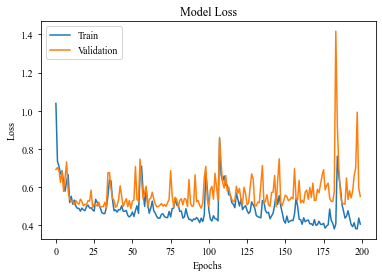

In [794]:

# 绘制loss曲线
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

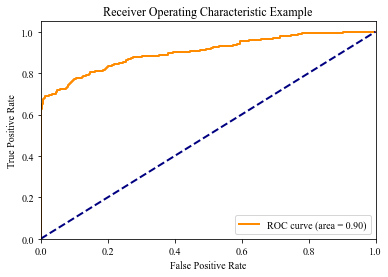

In [795]:
# 预测概率  
y_pred_prob = model.predict(X_test)[:, 0]  

# 计算ROC曲线的真正类率和假正类率  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)   
# 计算AUC  
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 绘制ROC曲线  
plt.figure()  
lw = 2  
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic Example')  
plt.legend(loc="lower right")  
plt.show()

In [798]:
#model.save('./data/model/brain_model.h5')
mlp_model = model

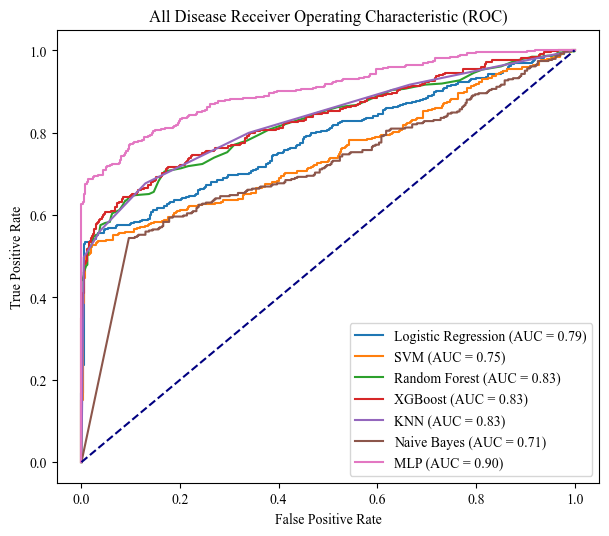

{'Logistic Regression': {'ACC': 0.74375, 'AUC': 0.7851499899839745, 'MCC': 0.5024918068645263, 'Recall': 0.5833333333333334, 'Precision': 0.8327137546468402}, 'SVM': {'ACC': 0.7575, 'AUC': 0.7485414162660255, 'MCC': 0.5556462896728712, 'Recall': 0.5364583333333334, 'Precision': 0.9279279279279279}, 'Random Forest': {'ACC': 0.76125, 'AUC': 0.8257681039663463, 'MCC': 0.5280824145655025, 'Recall': 0.6510416666666666, 'Precision': 0.8143322475570033}, 'XGBoost': {'ACC': 0.77125, 'AUC': 0.832450671073718, 'MCC': 0.5431829914607567, 'Recall': 0.703125, 'Precision': 0.7964601769911505}, 'KNN': {'ACC': 0.7775, 'AUC': 0.8307823768028846, 'MCC': 0.5599321922576995, 'Recall': 0.6770833333333334, 'Precision': 0.8280254777070064}, 'Naive Bayes': {'ACC': 0.70875, 'AUC': 0.7135416666666667, 'MCC': 0.42378735426720787, 'Recall': 0.5703125, 'Precision': 0.7630662020905923}, 'MLP': {'ACC': 0.81375, 'AUC': 0.9029384515224359, 'MCC': 0.62674962698002, 'Recall': 0.8365384615384616, 'Precision': 0.811188811

In [799]:

# 建立模型并训练
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    #'MLP': model
}
# 用于保存结果的字典
results = {}
# 训练模型并计算指标
plt.figure(figsize=(7, 6), dpi=100)
plt.rc('font',family='Times New Roman')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    
    results[name] = {'ACC': acc, 'AUC': auc, 'MCC': mcc, 'Recall': recall, 'Precision': precision}
    
    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    
name = 'MLP'
# 预测概率  
y_pred_prob = mlp_model.predict(X_test)[:, 0]  

y_pred = (y_pred_prob > 0.5).astype(int)
# 计算ROC曲线的真正类率和假正类率  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)   
auc = roc_auc_score(y_test, y_pred_prob)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
recall = tp / (tp + fn)
precision = tp / (tp + fp)

results[name] = {'ACC': acc, 'AUC': auc, 'MCC': mcc, 'Recall': recall, 'Precision': precision}

# 绘制ROC曲线
plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Disease Receiver Operating Characteristic (ROC)')
plt.legend()
plt.savefig('all_ROC.png',dpi=300)
plt.show()
print(results)
# 打印结果
